---
title: "13-SAS 卡方检验1-四格表资料卡方检验"
author: "Simon Zhou"
date: "2025-06-06"
date-modified: "2025-06-06"
format: 
    html:
        code-fold: true
        code-line-numbers: true
        code-highlight: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 3
---

In [1]:
%load_ext saspy.sas_magic

## $\chi^2$概述

卡方检验是一种基于卡方分布的假设检验方法，主要用于检验两个离散变量之间是否存在关联（独立性检验）或理论分布与观测分布是否一致（适配度检验）。其基本思想是比较实际观测值与期望值之间的偏离程度，卡方值越小，表示实际值越接近期望值。

关于卡方检验的具体论述可查看本网站的 Learn/Basic 下的 卡方检验的章节。

在 SAS 中卡方检验主要使用 `freq` 语句来完成。`freq` 语句主要用于产生一维或多维的频数表和列联表,并对列联表资料计算各种统计量。

## 基本公式

In [3]:
%%SAS
/*程序13-1*/
data chi13_1;
    set 'Data\prg8_1.sas7bdat';  /* 从已有数据集读取 */
run;

proc freq;
    tables group*LDL/chisq expected;
run;

### 结果说明

1. `表“LDL-group”的统计量` 部分为，检验的结果及3个分析行列变量的关联性统计量。首先是检验的结果,其中第一列列出了各种进行，检验的方法,从上至下分别为卡方(基本公式计算法)似然比法连续性校正法、Mantel-Haenszel法,第二列为自由度,第三列为各种方法计算所得的值,第四列为x值所对应的概率值(P值)。根据不同的资料可选择不同的结果。本例由于总频数>40所有的理论频数均>5,所以选用基本公式法,则 $\chi^2=21.5540,P<0.0001$,说明两组异常率差别有统计学意义,冠心病患者的低密度脂蛋白异常率高
于正常人。
2. 检验结果的下方列出的3个分析行列变量的关联性统计量,分别为:Phi 系数、列联系数和 Cramer V 统计量,它们的值都在 -1 和 1 之间,绝对值越大说明关系越密切。
3. Fisher精确概率法结果,输出结果包括了四格表中第1行第1列所在单元格的实际频数及左侧、右侧概率、表概率和双侧概率其中左侧概率为四格表边缘合计数固定条件下表中第1行第1列所在单元格的实际频数(本例为 41)不断减少而至不可能再减少所构成的所有四格表(包括41)的概率之和,为1.0000。右侧慨率则为所有第1行第1列单元格的实际频数 ≥99 的所有四格表的概率之和,其<0.0001。表概率即为当第1行第1列单元格的实际频数等于 41 时四格表的概率,其 <0.0001。双侧概率则以本四格表出现的概率为 P,而将 $P≤P$ ,的所有四格表的概率相加所得,本例为<0.0001,结论与 $\chi^2$ 检验一致。

## 连续性校正公式

当 $1≤T<5$ ,且 $n≥40$ 时,需选用连续性校正公式计算的结果.

In [4]:
%%SAS
/*程序13-2*/
data chi13_2;
    set 'Data\prg8_2.sas7bdat';  /* 从已有数据集读取 */
run;

proc freq;
    tables group*eff/chisq expected norow nocol nopercent;
run;

## 配对四格表资料的$\chi^2$检验

配对四格表的主要目的是为了判断行列变量的一致性。


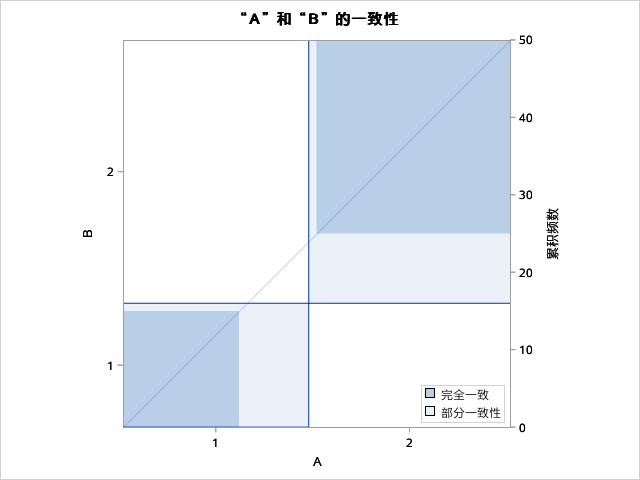

In [5]:
%%SAS
/*程序13-3*/
data chi13_3;
    set 'Data\prg8_3.sas7bdat';  /* 从已有数据集读取 */
run;

proc freq;
    tables A*B/agree;
run;

### 结果说明

1. 第一部分是 McNemar 检验的统计量、自由度和P值,本例为x=6.400 0,P=0.011 4<0.05,说明两种培养基的阳性率的差异有统计学意义,甲培养基的阳性率高于乙培养基。
2. 第二部分是一致性检验的Kappa值、渐近标准误和 95% 置信区间,本例 Kappa 值为 0.594 2,其 95% 置信区间为(0.3815,0.8068)。
3. 根据经验 Kappa≥0.75 表明两者一致性较好,0.4≤Kappa<0.75 表明一致性一般,Kappa<0.4 则表明一致性较差。

## Fisher确切概率法

当四格表任一格子理论频数 T<1,或n<40时,需使用连续性校正公式（Fisher确切概率法）计算的结果。

In [6]:
%%SAS
/*程序13-4*/
data chi13_4;
    set 'Data\prg8_4.sas7bdat';  /* 从已有数据集读取 */
run;

proc freq;
    tables group*eff/exact;
run;

### 结果说明

这里使用的Fisher确切概率法，所以应该查看 `Fisher 的精确检验` 中的结果，这里以双侧为例，得到 P 值为 1.0000，P>0.05，即说明尚不能认为两种疗法的的总体有效率有不同。

### P=1.0000

这里的 P=1.0000 有一点反直觉，理论上，Fisher 确切概率法的 P 值范围在 0 到 1 之间，但在某些极端情况下可能出现 P=1 的结果。

当实际观测数据完全符合零假设（即两组完全无差异）时，所有可能的排列组合中，只有当前观测数据一种情况满足零假设，且其他所有可能的排列均与零假设偏离更大（即概率更低）。此时：

- 单侧检验：若零假设为 “组 1≤组 2”，而观测数据显示两组率完全相等（如 a/(a+b) = c/(c+d)），则所有偏离零假设的情况（如组 1 > 组 2）的概率之和为 0，因此 P=1（表示 “观测数据与零假设完全一致的概率为 100%”）。
- 双侧检验：若考虑两组率相等的情况，且所有偏离零假设的排列（无论是组 1 > 组 2 还是组 1 < 组 2）的概率之和为 0，则 P=1。

**注意事项**

- P=1 的本质：并非表示 “零假设一定成立”，而是在当前样本量和数据下，没有任何证据显示两组存在差异。
- 小样本局限性：Fisher 确切概率法适用于小样本，但当样本量较大时，可能因计算量过大而不适用，此时可改用卡方检验或连续性校正卡方检验。
- 实际应用场景：P=1 通常出现在两组数据完全一致（如发生率相同）或极端稀疏数据（如事件发生数为 0）的情况下，属于理论上的特殊情况，实际研究中较为罕见。